In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
# import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\aamir\AppData\Local\Temp\ipykernel_8096\4211111341.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [1]:
import numpy as np
from sklearn.datasets import make_classification
import torch
from torch import nn, optim
from skorch import NeuralNetClassifier
from pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt

In [3]:
## Try pyperch
import numpy as np
from sklearn.datasets import make_classification
import torch
from torch import nn
from skorch import NeuralNetClassifier
from skorch import NeuralNet
from pyperch.neural.ga_nn import GAModule  
from pyperch.utils.decorators import add_to
from skorch.dataset import unpack_data
import copy
import matplotlib.pyplot as plt


## Training the neural network

In [4]:
import pandas as pd
features_df = pd.read_csv('data/breast_cancer_data_features.csv')
labels_df = pd.read_csv('data/breast_cancer_data_targets.csv')
labels_df = labels_df.map(lambda x : 0 if x == 'B' else 1)

In [5]:
features_df = features_df.astype('float32').to_numpy()
labels_df = labels_df.astype('int64').to_numpy().reshape(-1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, \
                                                    test_size = 0.2, random_state = 42)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
# one_hot = OneHotEncoder()

# y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [7]:
from skorch.callbacks import EpochScoring
seed = 45
np.random.seed(seed)
torch.manual_seed(seed)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=30,
    module__output_dim=2,
    module__hidden_units=16,
    module__hidden_layers=1,
    max_epochs=500,
    verbose=0,
    callbacks=[EpochScoring(scoring='accuracy', name='train_acc', on_train=True),],
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    lr=.001,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
np.random.seed(seed)
torch.manual_seed(seed)
net.fit(features_df, labels_df)
y_proba = net.predict_proba(features_df)

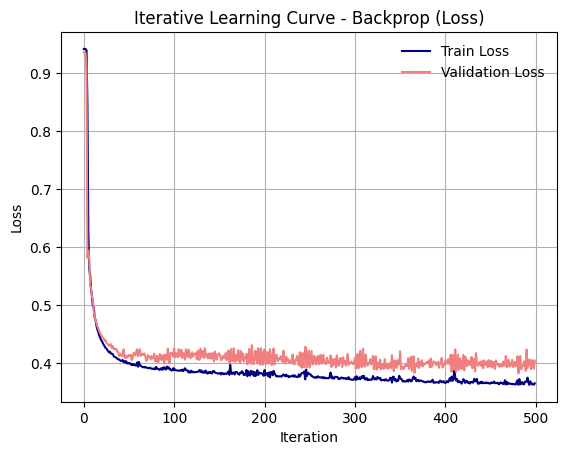

In [9]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve - Backprop (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

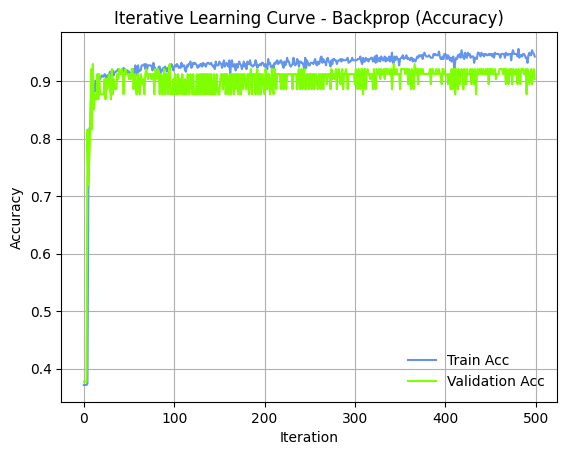

In [10]:
# plot the iterative learning curve (accuracy)
plt.plot(net.history[:, 'train_acc'], label='Train Acc', color='cornflowerblue')
plt.plot(net.history[:, 'valid_acc'], label='Validation Acc', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Iterative Learning Curve - Backprop (Accuracy)")
plt.grid(visible=True)
plt.legend(frameon=False)

## RHC

In [11]:
from pyperch.neural.rhc_nn import RHCModule 

np.random.seed(seed)
torch.manual_seed(seed)
net_rhc = NeuralNetClassifier(
    module=RHCModule,
    module__input_dim=30,
    module__output_dim=2,
    module__hidden_units=16,
    module__hidden_layers=1,
    module__step_size=.05,
    max_epochs=5000,
    verbose=0,
    callbacks=[EpochScoring(scoring='accuracy', name='train_acc', on_train=True),],
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)


np.random.seed(seed)
torch.manual_seed(seed)
RHCModule.register_rhc_training_step()


np.random.seed(seed)
torch.manual_seed(seed)
net_rhc.fit(features_df, labels_df)

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=RHCModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (output_activation): Softmax(dim=-1)
    (layers): ModuleList(
      (0): Linear(in_features=30, out_features=16, bias=True)
      (1): Linear(in_features=16, out_features=16, bias=True)
      (2): Linear(in_features=16, out_features=2, bias=True)
    )
  ),
)

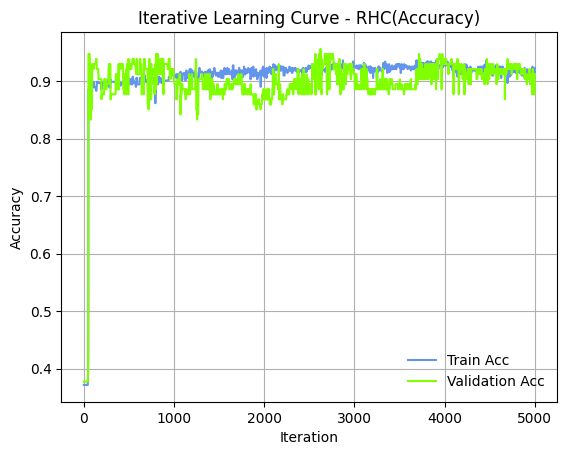

In [12]:
# plot the iterative learning curve (accuracy)
plt.plot(net_rhc.history[:, 'train_acc'], label='Train Acc', color='cornflowerblue')
plt.plot(net_rhc.history[:, 'valid_acc'], label='Validation Acc', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Iterative Learning Curve - RHC(Accuracy)")
plt.grid(visible=True)
plt.legend(frameon=False)

In [13]:
from pyperch.neural.sa_nn import SAModule

np.random.seed(seed)
torch.manual_seed(seed)
net_sa = NeuralNetClassifier(
    module=SAModule,
    module__input_dim=30,
    module__output_dim=2,
    module__hidden_units=16,
    module__hidden_layers=1,
    module__step_size=.1,
    module__t=2000,
    module__cooling=.95,
    max_epochs=5000,
    verbose=0,
    callbacks=[EpochScoring(scoring='accuracy', name='train_acc', on_train=True),],
    # Shuffle training data on each epoch
)

np.random.seed(seed)
torch.manual_seed(seed)
SAModule.register_sa_training_step()

np.random.seed(seed)
torch.manual_seed(seed)
net_sa.fit(features_df, labels_df)

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=SAModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (output_activation): Softmax(dim=-1)
    (layers): ModuleList(
      (0): Linear(in_features=30, out_features=16, bias=True)
      (1): Linear(in_features=16, out_features=16, bias=True)
      (2): Linear(in_features=16, out_features=2, bias=True)
    )
  ),
)

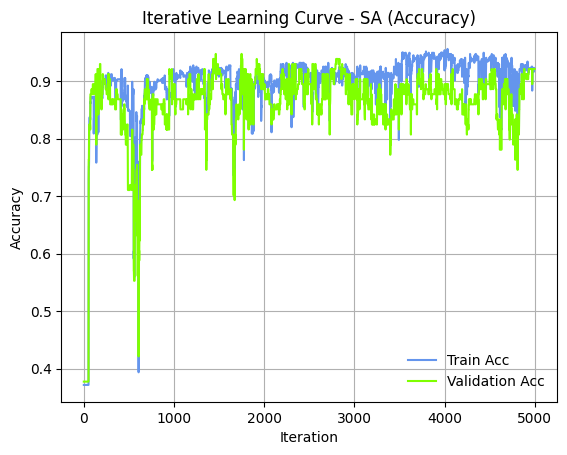

In [14]:
# plot the iterative learning curve (accuracy)
plt.plot(net_sa.history[:, 'train_acc'], label='Train Acc', color='cornflowerblue')
plt.plot(net_sa.history[:, 'valid_acc'], label='Validation Acc', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Iterative Learning Curve - SA (Accuracy)")
plt.grid(visible=True)
plt.legend(frameon=False)

## GA

In [17]:
np.random.seed(seed)
torch.manual_seed(seed)
net_ga = NeuralNetClassifier(
    module=GAModule,
    module__input_dim=30,
    module__output_dim=2,
    module__hidden_units=16,
    module__hidden_layers=1,
    module__population_size=400,
    module__to_mate=200,
    module__to_mutate=50,
    max_epochs=100,
    verbose=0,
    callbacks=[EpochScoring(scoring='accuracy', name='train_acc', on_train=True),],
    # use nn.CrossEntropyLoss instead of default nn.NLLLoss
    # for use with raw prediction values instead of log probabilities
    criterion=nn.CrossEntropyLoss(),
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

np.random.seed(seed)
torch.manual_seed(seed)
GAModule.register_ga_training_step()

np.random.seed(seed)
torch.manual_seed(seed)
net_ga.fit(features_df, labels_df)

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=GAModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (output_activation): Softmax(dim=-1)
    (layers): ModuleList(
      (0): Linear(in_features=30, out_features=16, bias=True)
      (1): Linear(in_features=16, out_features=16, bias=True)
      (2): Linear(in_features=16, out_features=2, bias=True)
    )
  ),
)

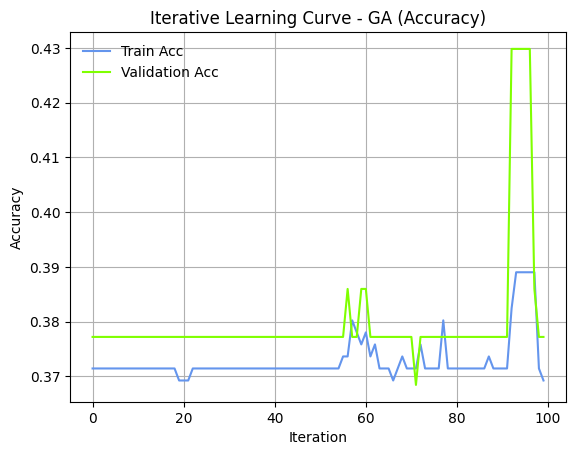

In [18]:
# plot the iterative learning curve (accuracy)
plt.plot(net_ga.history[:, 'train_acc'], label='Train Acc', color='cornflowerblue')
plt.plot(net_ga.history[:, 'valid_acc'], label='Validation Acc', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Iterative Learning Curve - GA (Accuracy)")
plt.grid(visible=True)
plt.legend(frameon=False)

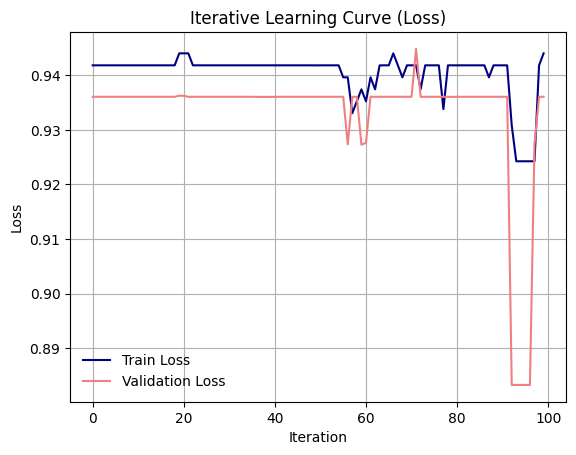

In [20]:
# plot the iterative learning curve (loss)
plt.plot(net_ga.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net_ga.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)